In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Импортируем TensorFlow и tf.keras
import tensorflow as tf
from tensorflow import keras

# А также добавим вспомогательные библиотеки для вычислений и вывода данных на экран
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


viridis


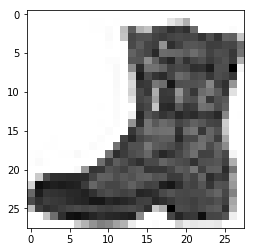

In [3]:
# x_train[23]
# # x_train.shape
# y_train[451]
print(plt.rcParams["image.cmap"])


# plt.grid(False)
plt.imshow(x_train[150], cmap='binary')


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
list(set(y_train))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [0]:
x_train = x_train / 255.0
x_test = x_test / 255.0

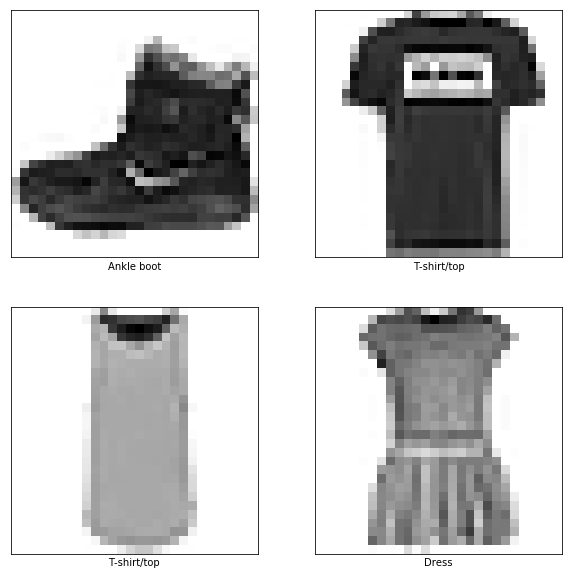

In [7]:
fig, ax_lst = plt.subplots(2, 2, figsize=(10,10), subplot_kw=dict(yticks=(), xticks=()))

for i, axe in enumerate(ax_lst.flat):
  axe.imshow(x_train[i], cmap='binary')
  axe.set_xlabel(class_names[y_train[i]])

In [8]:
keras.layers.Dense

tensorflow.python.keras.layers.core.Dense

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 6s 97us/sample - loss: 0.4997 - acc: 0.8256
Epoch 2/5
60000/60000 [==============================] - 5s 84us/sample - loss: 0.3738 - acc: 0.8657
Epoch 3/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3347 - acc: 0.8788
Epoch 4/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.3122 - acc: 0.8850
Epoch 5/5
60000/60000 [==============================] - 5s 83us/sample - loss: 0.2940 - acc: 0.8920


In [14]:
test_loss, test_acc = model.evaluate(x_train, y_train)

print('Точность после проверки:', test_acc)

60000/60000 [==============================] - 3s 45us/sample - loss: 0.2834 - acc: 0.8970
Точность после проверки: 0.89695


In [0]:
predictions = model.predict(x_train)

In [16]:
predictions[0]

array([1.1570370e-08, 6.4061140e-10, 2.1086787e-11, 3.4469046e-11,
       8.9798073e-12, 3.0961263e-04, 7.3455986e-10, 5.2670473e-03,
       2.3770854e-08, 9.9442333e-01], dtype=float32)

In [17]:
np.argmax(predictions[0])

9

In [19]:
y_test[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

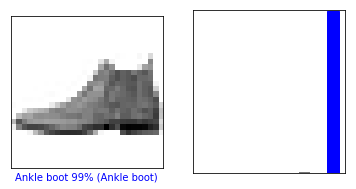

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
plt.show()

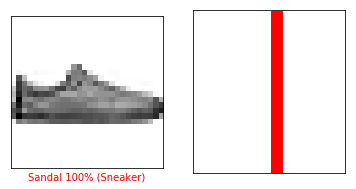

In [22]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
plt.show()

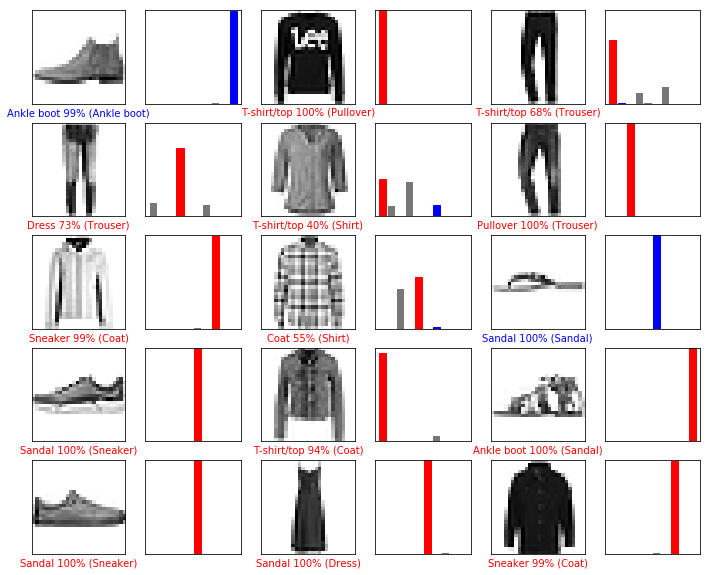

In [24]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
plt.show()